# Project: Investigate a Dataset (No_show appointments in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Medical appointment no-shows analysis 

This analysis aims to know reasons for patients no-showing at the scheduled appointments, as well as get insights about their health system. 

In [48]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [49]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [50]:
#to know the num of columns and rows in this dataset
df.shape

(110527, 14)

In [51]:
# to know if there are missing data or not
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [52]:
"No Missing Data"


'No Missing Data'

In [53]:
#check if there is an age with minus or 0 value
df[df["Age"] <= 0].count()

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
Hipertension      3540
Diabetes          3540
Alcoholism        3540
Handcap           3540
SMS_received      3540
No-show           3540
dtype: int64

In [54]:
#To know some important information about this data like (Mean,Median,Min,Max,.....)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<p>Comments</p>
<ul>
    <li>The mean of age for patients are 37 years old</li>
    <li>There is an error in age for one patient as it shows -1 which is not logical & others are Zero which not make sense</li>
    <li>The max age is 115 years old</li>
    <li>PatientId and AppointmentID, are not important information in this data analysis for now</li>
</ul>






### Data Cleaning (Replace this with more specific notes!)

In [55]:
# Clean Age Column 
meanAge = df['Age'].mean()
df.loc[df.Age <= 0, 'Age'] = meanAge


In [56]:
#check if there is an age with minus or 0 value
df[df["Age"] <= 0].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [57]:
#rename the last column in this data to be read and spelling of Hypertension column
df.rename(columns={'No-show':'No_show','Hipertension':'Hypertension'},inplace=True)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [58]:
# To remove unnecessary columns in this data
df.drop(columns =['PatientId','AppointmentID'],inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
# To know the count of patient No_show and those show the appointment
df['No_show'].value_counts()


No     88208
Yes    22319
Name: No_show, dtype: int64

In [64]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [65]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 If most patients suffer from chronic diseases like Hypertension, Diabetes, or are Handicapped?
### Research Question 2 If all patients received SMS confirmation messages?
### Research Question 3 If most of the patients enrolled in scholarship?


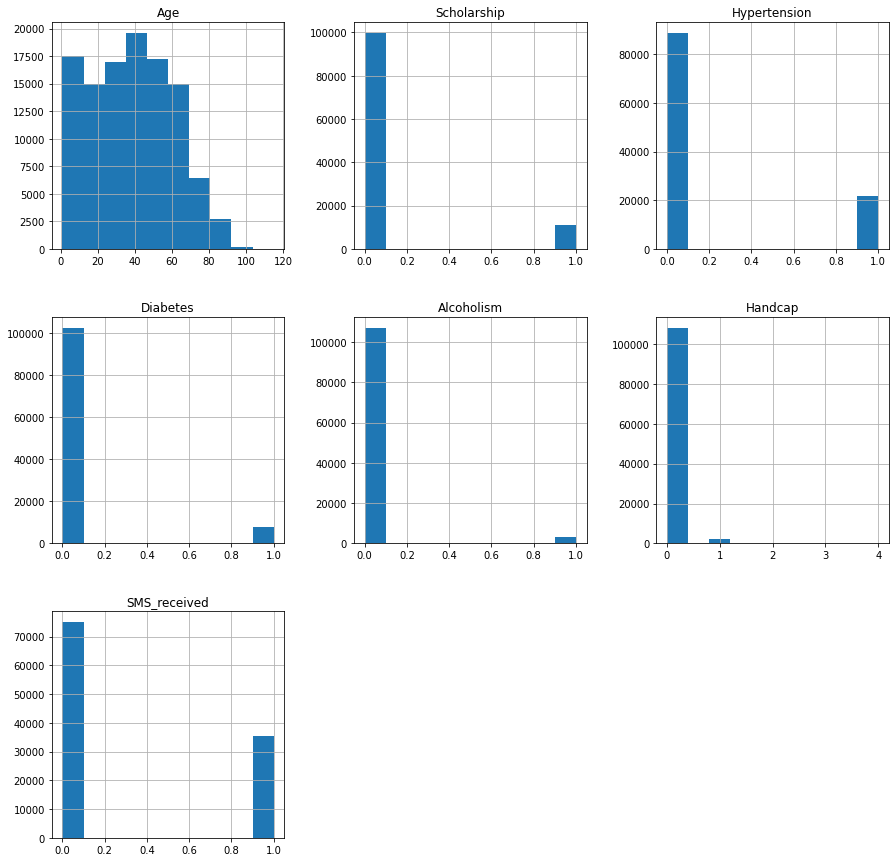

In [66]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,15));

<strong>Comments</strong>
<ul>
    <li>Most patients don't suffer from chronic diseases</li>  
    <li>patients who received SMS messages are near 30% </li>  
    <li>few patients that enrolled in the scholarship</li>  
</ul>

### Research Question 4 what is the ratio between patients who attended the appointment and others not

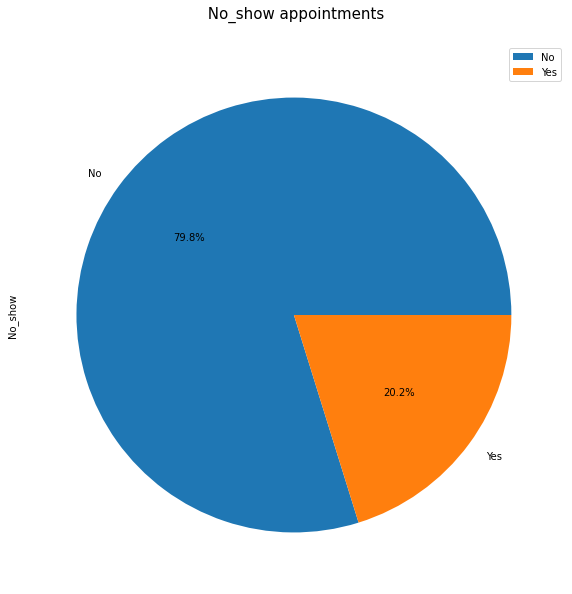

In [67]:
noShowDF = df['No_show'].value_counts()
pieChart = noShowDF.plot.pie(figsize=(10,10),autopct='%1.1f%%');
pieChart.set_title(' No_show appointments\n', fontsize = 15);
plt.legend();


<strong>Comment</strong>
<p>Patients who attended the appointment (79.8 %) are more the patients they don't(20.2%) </p>


### Research Question 5 comparison between patients who attended the appointments according to SMS confirmation messages

In [68]:
#To convert No_show column into numeric value to be easy for analysis and visualization
# No means not attended the appointments
#yes Means attended the appointments
noshow = {'No': 0, 'Yes':1}
df.replace({'No_show':noshow},inplace=True)
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0


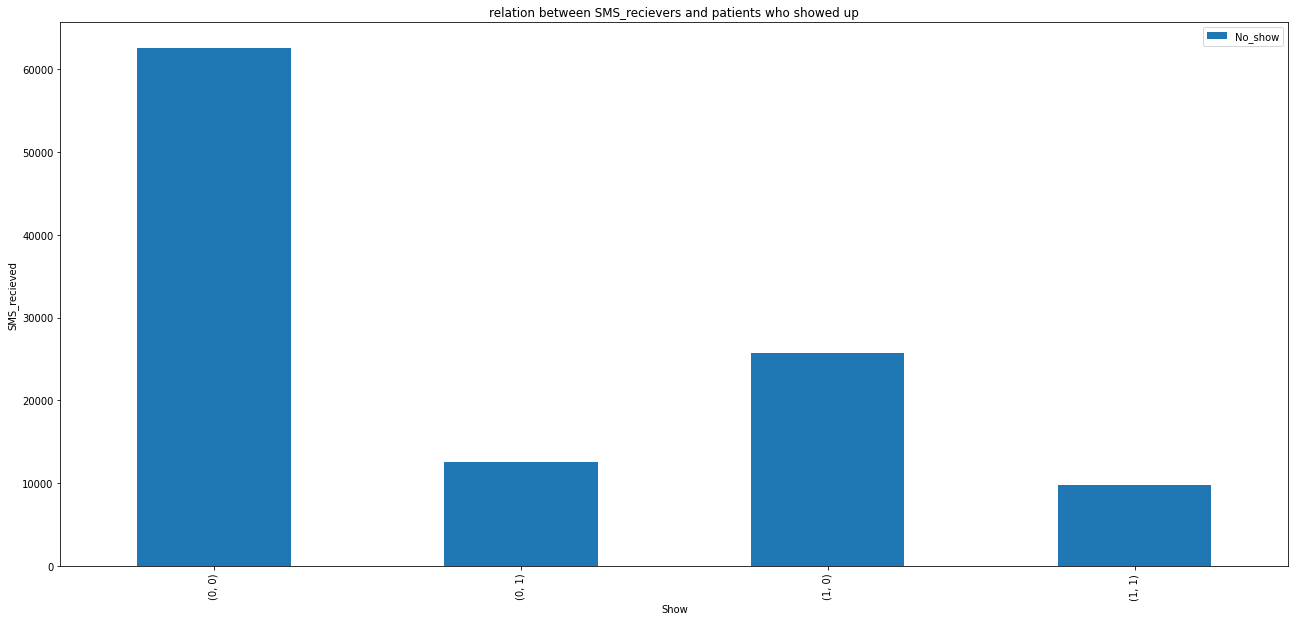

In [69]:
df.groupby('SMS_received')['No_show'].value_counts().plot(kind='bar',figsize=(22,10));
plt.xlabel("Show")
plt.ylabel("SMS_recieved")
plt.title("relation between SMS_recievers and patients who showed up")
plt.legend()


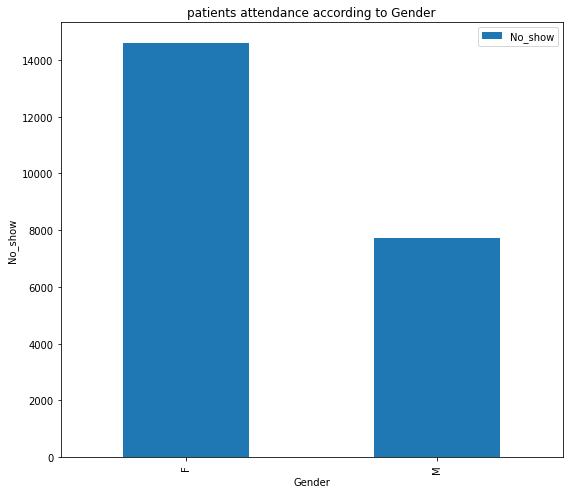

In [70]:
data = df.groupby('Gender')['No_show'].sum()
data.plot(x="Gender", y="No_show", kind="bar",figsize=(9,8))
plt.xlabel("Gender")
plt.ylabel("No_show")
plt.title("patients attendance according to Gender")
plt.legend()


Comment:
females that did not show up at the appointment more than males do  

### Research Question 6 If Handicapping is signifigant reason for patients no-showing at the scheduled appointments?

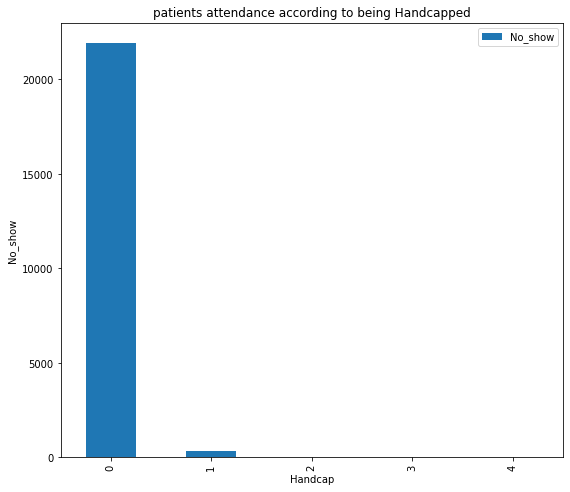

In [71]:
data = df.groupby('Handcap')['No_show'].sum()
data.plot(x="Handcap", y="No_show", kind="bar",figsize=(9,8))
plt.xlabel("Handcap")
plt.ylabel("No_show")
plt.title("patients attendance according to being Handcapped")
plt.legend()


Handicapping is not signifigant reason for patient no-showing at the scheduled appointments 

# Research Question 7 If showing up the appointments is affected by the patient neighborhood 

In [72]:
df.Neighbourhood.describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object

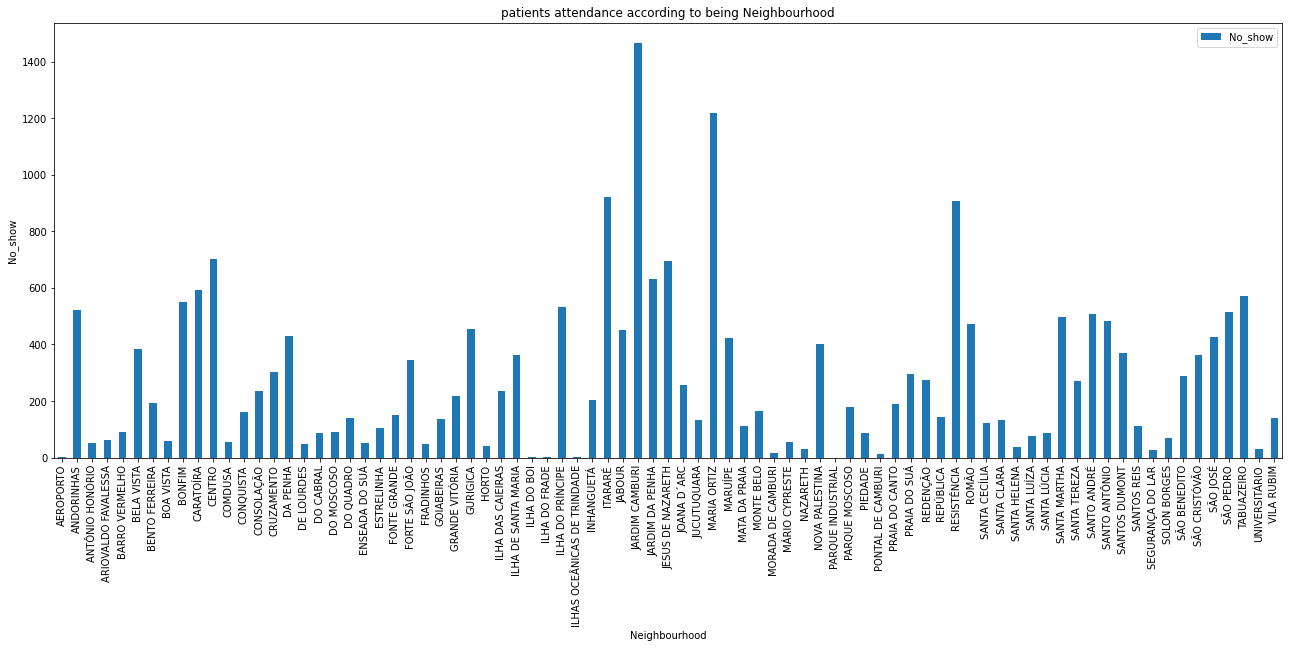

In [74]:
data = df.groupby('Neighbourhood')['No_show'].sum()
data.plot(x="Neighbourhood", y="No_show", kind="bar",figsize=(22,8))
plt.xlabel("Neighbourhood")
plt.ylabel("No_show")
plt.title("patients attendance according to being Neighbourhood")
plt.legend()

Comments:
it can be noticed there are 81 different neighborhood being considered and the top neighborhood is JARDIM CAMBURI where the highest number of patients has not attended the appointments comparing to other regions.

<a id='conclusions'></a>
## Conclusions

## Limitations of analysis:

> **1**: There is no description on how the data were acquired <br>
> **2**: There were few data to be cleaned in this dataset like age(there are 3540 patients withe age <= Zero) <br>
> **3**: the AppointmentDay sample not cover all months in the year